In [73]:
import pathlib
import re

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import yaml

import texture_strength_comparison_functions as functions

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load YAML file

The file paths and user inputs for the analysis of the Diamond 2017 and Diamond 2021 experiments are included in the `yaml` configuration files, to record the inputs of the analysis.

The information in the `yaml` file can be accessed like this.

In [74]:
# to load the Diamond 2021 analysis
config_path = "yaml/config_diamond_2017.yaml"
config = functions.get_config(config_path)

## Analysing texture changes for the `Diamond 2017` experiment with Fourier Peak Analysis

Load the **${\alpha}$-phase** texture strengths for the data refined using direct intensities from Continuous-Peak-Fit using Fourier peak analysis and write the results to new arrays.

In [75]:
cpf_alpha_2017_results = functions.load_sxrd_cpf_alpha(config_path)

The SXRD experiment number is: 
65

The SXRD results file is: 
../../SXRD_results/diamond_2017/065/texture-cpf/065-raw-intensities-10deg/alpha/065_texture_strength.txt

The SXRD results using Fourier peak analysis have been written to new arrays with the following keys: 
dict_keys(['image_number', 'texture_index', 'odf_max', 'phi1', 'PHI', 'phi2', '0002_pf_max', '10-10_pf_max', '11-20_pf_max'])



Load the **${\beta}$-phase** texture strengths for the data refined using direct intensities from Continuous-Peak-Fit using Fourier peak analysis and write the results to new arrays.

In [76]:
cpf_beta_2017_results = functions.load_sxrd_cpf_beta(config_path)

The SXRD experiment number is: 
65

The SXRD results file is: 
../../SXRD_results/diamond_2017/065/texture-cpf/065-raw-intensities-10deg/beta/065_texture_strength.txt

The SXRD results using Fourier peak analysis have been written to new arrays with the following keys: 
dict_keys(['image_number', 'texture_index', 'odf_max', 'phi1', 'PHI', 'phi2', '001_pf_max', '110_pf_max', '111_pf_max'])



### Plotting the ${\alpha}$ and ${\beta}$ texture changes during the `Diamond 2017` experiment from Fourier Peak Analysis

The texture strength changes in both the ${\alpha}$ and ${\beta}$ phases can be plotted together, over time, versus image number. Here, we are looking at texture changes during a short high temperature hold (to image 3160), followed by high temperature deformation of our Ti-64 sample, at a strain rate ~ 0.02 /s at 950${^\circ}$C, reaching 0.2 strain by image 3270 and reaching 0.5 strain by image 3360. Using the Fourier peak analysis we can capture some very interesting changes in both the the ${\alpha}$ and the ${\beta}$ texture during high temperature deformation.

The SXRD experiment number is: 
65

The output folder is: 
../../SXRD_results/diamond_2017/065/texture-

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-cpf/065_texture_index_cpf.png
Figure saved to: ../../SXRD_results/diamond_2017/065/texture-cpf/065_odf_max_cpf.png


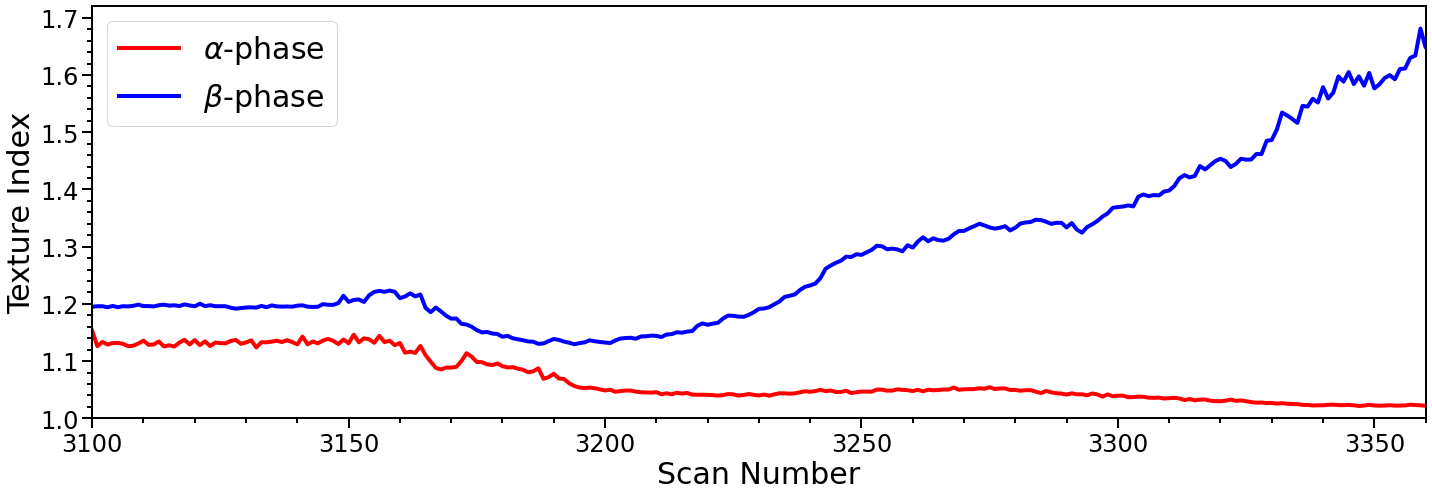

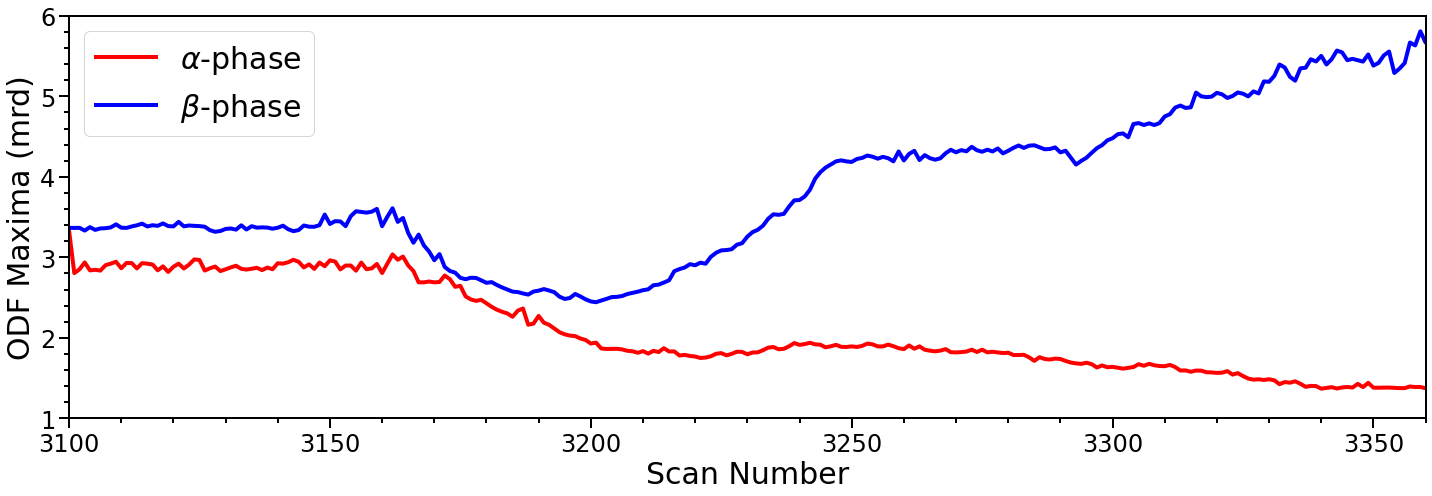

In [77]:
sxrd_experiment_number = config["user_inputs"]["sxrd_experiment_number"]
print("The SXRD experiment number is: ", sxrd_experiment_number, sep = '\n', end = '\n\n')

output_folder = config["file_paths"]["output_folder"].format(experiment_number = sxrd_experiment_number)
print("The output folder is: ", output_folder, sep = '\n', end = '\n\n')

fitting_type = "cpf"

texture_strength_type = "texture_index"
x_min = 3100
x_max = 3360
y_min = 1
y_max = 1.72

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, cpf_alpha_2017_results, cpf_beta_2017_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max)

texture_strength_type = "odf_max"
y_min = 1
y_max = 6

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, cpf_alpha_2017_results, cpf_beta_2017_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max)

We can also plot how the pole figure intensity maxima in both the ${\alpha}$ and ${\beta}$ phases change over time, versus image number, during the high temperature loading.

The first phase is: 
alpha

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-cpf/065_alpha_pf_max_cpf.png
The second phase is: 
beta

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-cpf/065_beta_pf_max_cpf.png


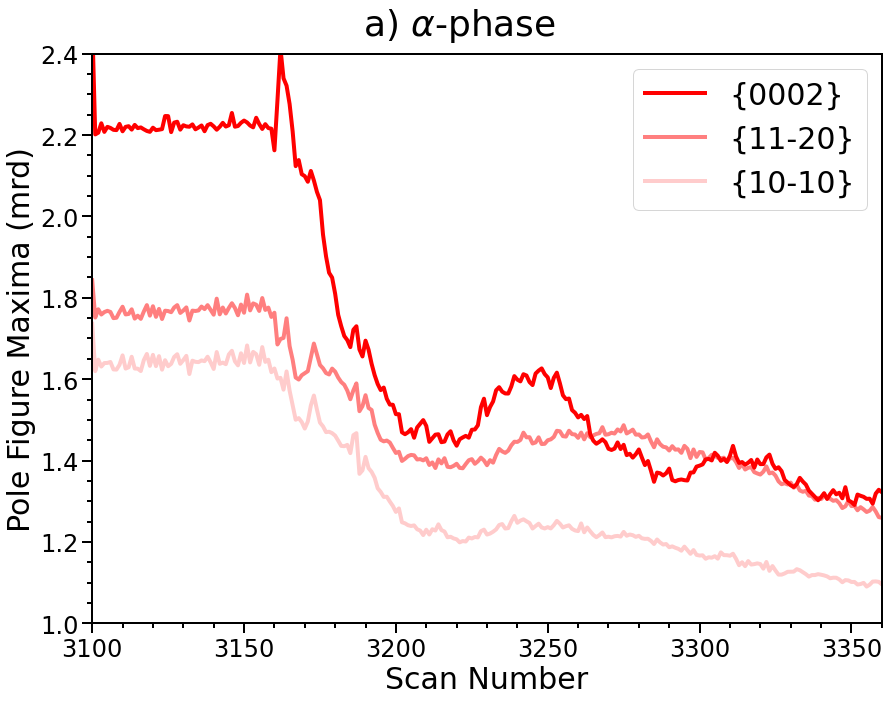

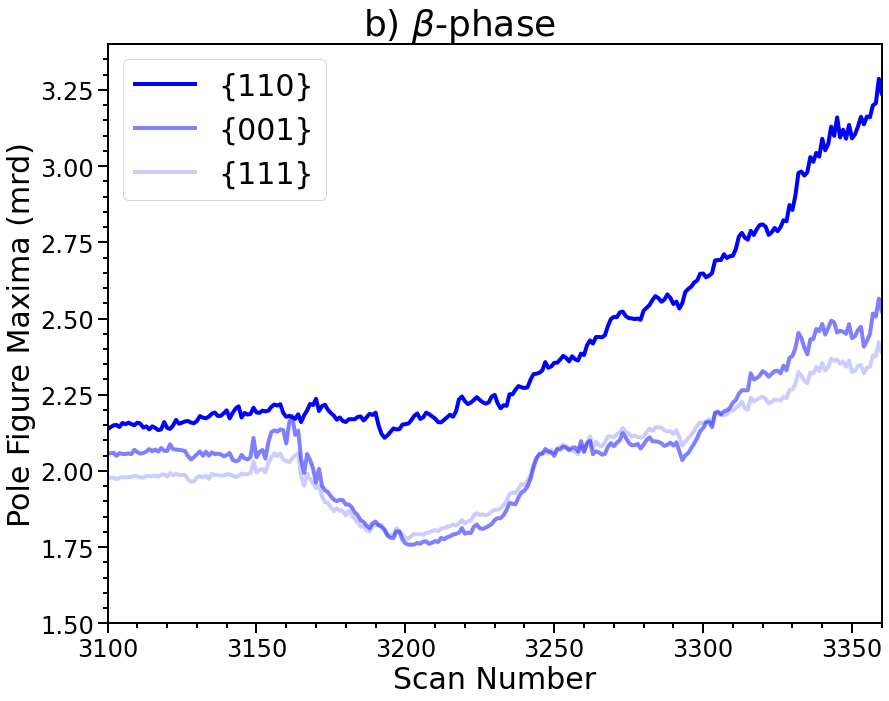

In [78]:
phase_1 = config["user_inputs"]["phase_1"]
print("The first phase is: ", phase_1, sep = '\n', end = '\n\n')

y_min = 1
y_max = 2.4

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_1, cpf_alpha_2017_results, fitting_type,
                                x_min, x_max, y_min, y_max)

phase_2 = config["user_inputs"]["phase_2"]
print("The second phase is: ", phase_2, sep = '\n', end = '\n\n')

y_min = 1.5
y_max = 3.4

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_2, cpf_beta_2017_results, fitting_type,
                                x_min, x_max, y_min, y_max)

## Analysing texture changes for the `Diamond 2017` experiment with MAUD analysis

Load the **${\alpha}$-phase** texture strengths for the data refined using direct intensities from MAUD using Rietveld refinement analysis and write the results to new arrays.

*Note, this has to be done with code, rather than as a function, due to issue with recording image_number during refinement.*

In [79]:
sxrd_experiment_number = config["user_inputs"]["sxrd_experiment_number"]
print("The SXRD experiment number is: ", sxrd_experiment_number, sep = '\n', end = '\n\n')
sxrd_maud_alpha_results_file = config["file_paths"]["sxrd_maud_alpha_results_file"].format(experiment_number = sxrd_experiment_number)
print("The SXRD results file is: ", sxrd_maud_alpha_results_file, sep = '\n', end = '\n\n')
sxrd_maud_results = np.loadtxt(sxrd_maud_alpha_results_file, usecols = np.arange(0,9), dtype='str', skiprows = 1)

maud_alpha_2017_results = {
                "image_number" : cpf_alpha_2017_results["image_number"],
                "texture_index" : sxrd_maud_results[:,1].astype(float),
                "odf_max" : sxrd_maud_results[:,2].astype(float),
                "phi1" : sxrd_maud_results[:,3].astype(float),
                "PHI" : sxrd_maud_results[:,4].astype(float),
                "phi2" : sxrd_maud_results[:,5].astype(float),
                "0002_pf_max" : sxrd_maud_results[:,6].astype(float),
                "10-10_pf_max" : sxrd_maud_results[:,7].astype(float),
                "11-20_pf_max" : sxrd_maud_results[:,8].astype(float),
                }
print("The SXRD results using MAUD have been written to new arrays with the following keys: ", maud_alpha_2017_results.keys(), sep = '\n', end = '\n\n')

The SXRD experiment number is: 
65

The SXRD results file is: 
../../SXRD_results/diamond_2017/065/texture-maud/065_texture_plots/alpha/texture_strength_alpha_065.txt

The SXRD results using MAUD have been written to new arrays with the following keys: 
dict_keys(['image_number', 'texture_index', 'odf_max', 'phi1', 'PHI', 'phi2', '0002_pf_max', '10-10_pf_max', '11-20_pf_max'])



Load the **${\beta}$-phase** texture strengths for the data refined using direct intensities from MAUD using Rietveld refinement analysis and write the results to new arrays.

*Note, this has to be done with code, rather than as a function, due to issue with recording image_number during refinement.*

In [80]:
sxrd_experiment_number = config["user_inputs"]["sxrd_experiment_number"]
print("The SXRD experiment number is: ", sxrd_experiment_number, sep = '\n', end = '\n\n')
sxrd_maud_beta_results_file = config["file_paths"]["sxrd_maud_beta_results_file"].format(experiment_number = sxrd_experiment_number)
print("The SXRD results file is: ", sxrd_maud_beta_results_file, sep = '\n', end = '\n\n')
sxrd_maud_results = np.loadtxt(sxrd_maud_beta_results_file, usecols = np.arange(0,9), dtype='str', skiprows = 1)

maud_beta_2017_results = {
                "image_number" : cpf_alpha_2017_results["image_number"],
                "texture_index" : sxrd_maud_results[:,1].astype(float),
                "odf_max" : sxrd_maud_results[:,2].astype(float),
                "phi1" : sxrd_maud_results[:,3].astype(float),
                "PHI" : sxrd_maud_results[:,4].astype(float),
                "phi2" : sxrd_maud_results[:,5].astype(float),
                "001_pf_max" : sxrd_maud_results[:,6].astype(float),
                "110_pf_max" : sxrd_maud_results[:,7].astype(float),
                "111_pf_max" : sxrd_maud_results[:,8].astype(float),
                }
print("The SXRD results using MAUD have been written to new arrays with the following keys: ", maud_beta_2017_results.keys(), sep = '\n', end = '\n\n')

The SXRD experiment number is: 
65

The SXRD results file is: 
../../SXRD_results/diamond_2017/065/texture-maud/065_texture_plots/beta/texture_strength_beta_065.txt

The SXRD results using MAUD have been written to new arrays with the following keys: 
dict_keys(['image_number', 'texture_index', 'odf_max', 'phi1', 'PHI', 'phi2', '001_pf_max', '110_pf_max', '111_pf_max'])



### Plotting the ${\alpha}$ and ${\beta}$ texture changes during the `Diamond 2017` experiment from MAUD

The texture strength changes in both the ${\alpha}$ and ${\beta}$ phases can also be plotted from the MAUD analysis. However, the texture changes measured using MAUD are much weaker than those calculated using the Fourier peak analysis, a result thought to be affected by the E-WIMV algorithm used to calculate texture in MAUD, which has been found to average over any texture intensity variation - see Diamond 2021 results.

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-maud/065_texture_index_maud.png
Figure saved to: ../../SXRD_results/diamond_2017/065/texture-maud/065_odf_max_maud.png


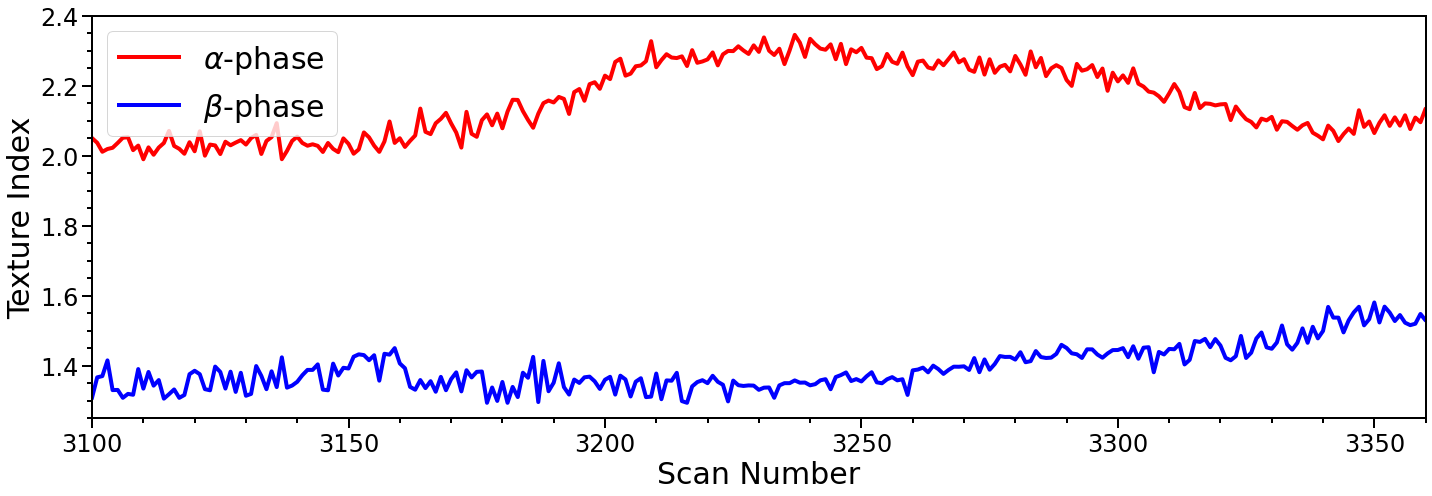

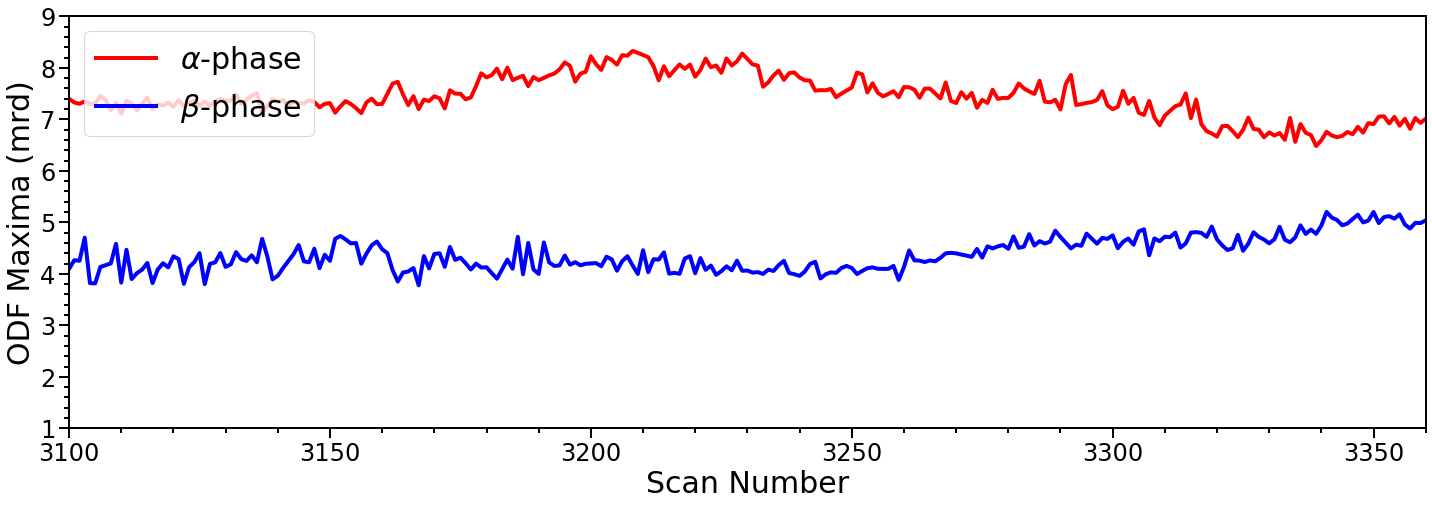

In [81]:
fitting_type = "maud"

texture_strength_type = "texture_index"
y_min = 1.25
y_max = 2.4

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, maud_alpha_2017_results, maud_beta_2017_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max)

texture_strength_type = "odf_max"
y_min = 1
y_max = 9

functions.plot_texture_strength_two_phase(output_folder, sxrd_experiment_number, maud_alpha_2017_results, maud_beta_2017_results, 
                                          texture_strength_type,  fitting_type,
                                          x_min, x_max, y_min, y_max)

We can also plot how the pole figure intensity maxima in both the ${\alpha}$ and ${\beta}$ phases from the MAUD analysis. However, this again shows a much weaker texture changes than expected.

The first phase is: 
alpha

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-maud/065_alpha_pf_max_maud.png
The second phase is: 
beta

Figure saved to: ../../SXRD_results/diamond_2017/065/texture-maud/065_beta_pf_max_maud.png


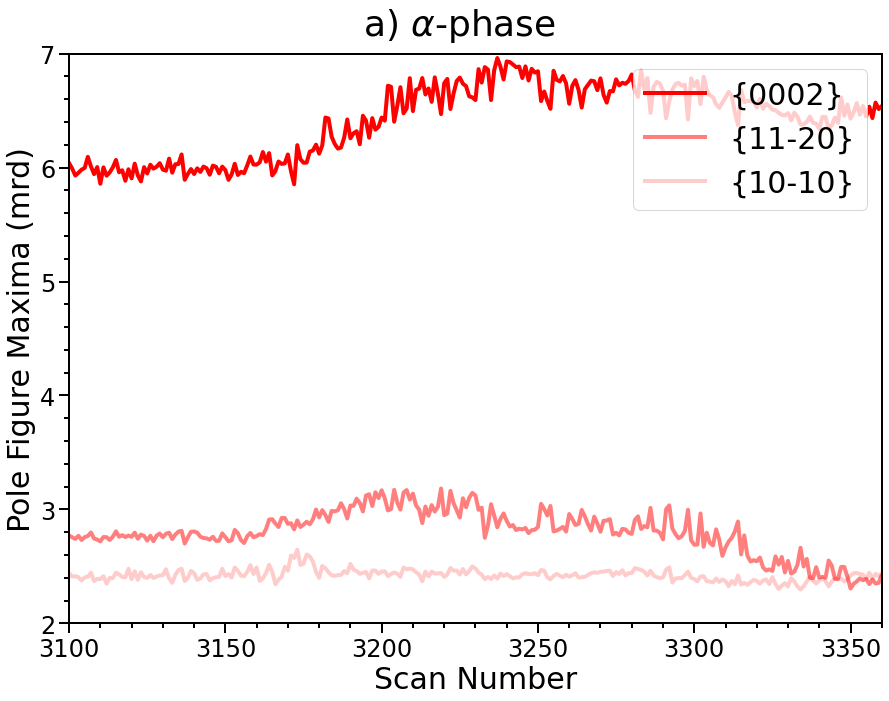

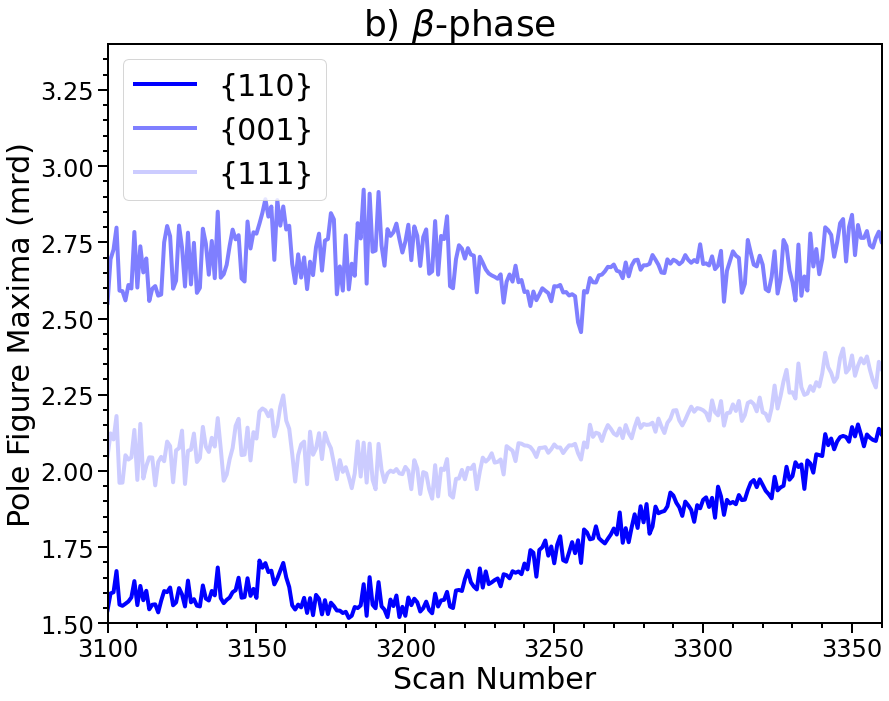

In [82]:
phase_1 = config["user_inputs"]["phase_1"]
print("The first phase is: ", phase_1, sep = '\n', end = '\n\n')

y_min = 2
y_max = 7

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_1, maud_alpha_2017_results, fitting_type,
                                x_min, x_max, y_min, y_max)

phase_2 = config["user_inputs"]["phase_2"]
print("The second phase is: ", phase_2, sep = '\n', end = '\n\n')

y_min = 1.5
y_max = 3.4

functions.plot_pf_intensity_two_phase(output_folder, sxrd_experiment_number, 
                                phase_2, maud_beta_2017_results, fitting_type,
                                x_min, x_max, y_min, y_max)